In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression

plt.rcParams['figure.figsize'] = (10,6)

In [19]:
HrData = pd.read_csv("../Assignment2/HR.csv", sep=',')
HrData.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
HrData.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Checking and Removing Null and Bad Data

In [21]:
HrData.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

## Comparing by Plotting most dependent Variables that affect the prediction

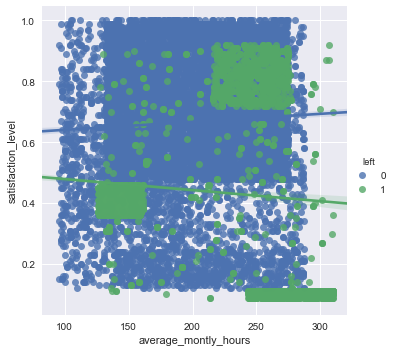

In [22]:
sns.lmplot(y="satisfaction_level", x="average_montly_hours", data=HrData, hue="left")
sns.plt.show()

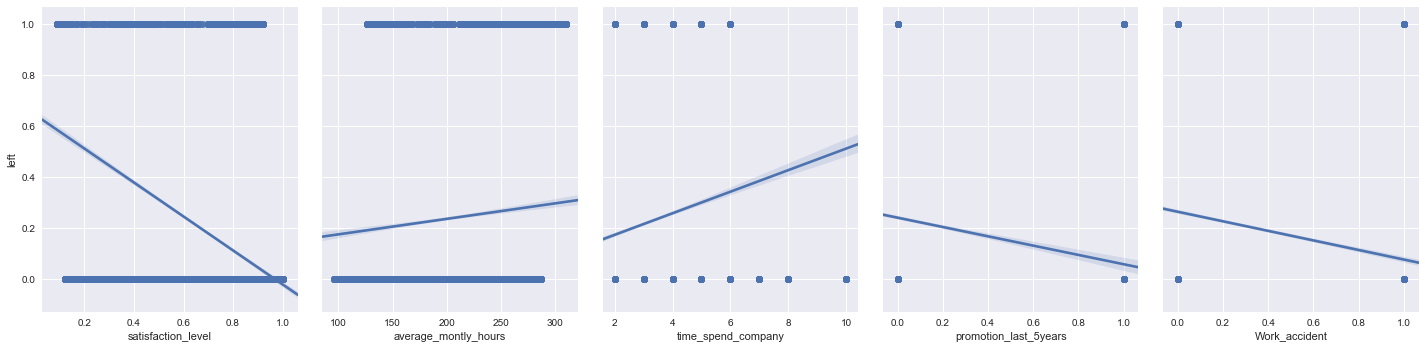

In [23]:
sns.pairplot(HrData, x_vars=['satisfaction_level','average_montly_hours','time_spend_company','promotion_last_5years','Work_accident'],
             y_vars=['left'], size=5, aspect=.8, kind="reg");
#sns.lmplot(x='satisfaction_level', y='left', data=HrData, ci=None)

## Finding Logit and Confidence Interval

In [24]:
#HrData['intercept'] = 1.0
pred=['satisfaction_level','time_spend_company','promotion_last_5years','Work_accident','average_montly_hours']
Hr_Model = sm.Logit(HrData['left'], HrData[pred]).fit()
Hr_Model.summary()

Optimization terminated successfully.
         Current function value: 0.452037
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14994
Method:                           MLE   Df Model:                            4
Date:                Mon, 06 Nov 2017   Pseudo R-squ.:                  0.1764
Time:                        17:10:11   Log-Likelihood:                -6780.1
converged:                       True   LL-Null:                       -8232.3
                                        LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -3.6645      0.078    -46.989      0.000      -3.817      -3.512
time_spend_company        0.1996      0.013     15.142      0.000       0.174       0.225
promotion_last_5years    -1.7494      0.253     -6.915      0.000      -2.245      -1.254
Work_accident            -1.4896      0.088    -17.000      0.000      -1.661      -1.318
average_montly_hours      0.0017      0.000      5.806      0.000       0.001       0.002
=========================================================================================
"""

In [25]:
Hr_Model.conf_int()

,0,1
satisfaction_level,-3.817383,-3.511677
time_spend_company,0.173800,0.225483
promotion_last_5years,-2.245257,-1.253551
Work_accident,-1.661386,-1.317899
average_montly_hours,0.001103,0.002227


In [26]:
np.exp(Hr_Model.params)

satisfaction_level       0.025616
time_spend_company       1.220965
promotion_last_5years    0.173878
Work_accident            0.225453
average_montly_hours     1.001667
dtype: float64

## Finding Odd Ratio

In [27]:
# odds ratios and 95% CI
params = Hr_Model.params
conf = Hr_Model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
satisfaction_level,0.021985,0.029847,0.025616
time_spend_company,1.189818,1.252927,1.220965
promotion_last_5years,0.105900,0.285489,0.173878
Work_accident,0.189876,0.267697,0.225453
average_montly_hours,1.001104,1.002230,1.001667


In [28]:
HrData.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


## Creating Logistic Model, Predicting Probability, Coeffecient and Intercept

In [29]:
X = HrData[pred]
#setting target
y = HrData["left"]

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(X_train, y_train)

LRm.predict_proba(X_test)  # The returned estimates for all classes are ordered by the label of classes.

array([[ 0.6800976 ,  0.3199024 ],
       [ 0.74661834,  0.25338166],
       [ 0.86780286,  0.13219714],
       ..., 
       [ 0.61988459,  0.38011541],
       [ 0.7708304 ,  0.2291696 ],
       [ 0.33850304,  0.66149696]])

In [30]:
LRm.coef_

array([[ -3.70104399e+00,   1.96191112e-01,  -1.47292387e+00,
         -1.46628419e+00,   1.52222564e-03]])

In [31]:
LRm.intercept_

array([ 0.07103183])

In [32]:
LRm.decision_function(X_test)

array([-0.75422037, -1.08065725, -1.88167023, ..., -0.48905839,
       -1.21300604,  0.66997233])

In [33]:
LRm.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

## K-Fold Cross Validation, Finding Accuracy of Prediction

In [34]:
k=10
acc=[]
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=i)
    # Logistic regression metrics
    LRm = lr.fit(X_train, y_train)
    a=metrics.accuracy_score(y_test, LRm.predict(X_test))
    acc.append(a)
    
print (acc)
print (np.mean(acc))
print (np.std(acc))

[0.76266666666666671, 0.76400000000000001, 0.7583333333333333, 0.76833333333333331, 0.76966666666666672, 0.754, 0.76366666666666672, 0.76666666666666672, 0.7543333333333333, 0.76500000000000001]
0.762666666667
0.00518330653798


In [35]:
y_pred = LRm.predict(X_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 0.765


### Is the relationship significant?
    > Yes, the relationship seems significant based on the calculation and Plotting that I did to get the best possible predictors and target variables. I compared all of that with all possible permutations and combinations and finally got the best fit as my final predicting model of actual House Price.
    > Most Significant Relationships is found were - Satisfaction_Ratio(X1) and Left(Y)
                                               - Time_Spend_Company(X2) and Left(Y)
                                               - Average_Hours_Spend(X3) and Left(Y)
                                               - Promotion_last5_years(X4) and Left(Y)
    > Others were slighlty related and may effect by overfitting data so I kept these 4 as my best fit model.
    
### Are any model assumptions violated?
    > Previously it was violating due to the adding more predictors or removing predictors from the current model. But after all trial and error Model Fits perfect and giving more than 77% accuracy on predictions. However, there is still scope of improvement that can be utilised by using other algorithms.
    
### Cross-validate the model. How well did it do?
    > I used 10 k Fold and it works perfectly Fine. It is giving me best accuracy, mean and prediction score of 0.76 that is good enough for making any prediction.